In [71]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import requests
import numpy as np

from pathlib import Path

DATA_DIR = "../data/videos"

In [72]:
import librosa

SR = 44100
SEGMENT_DUR = 2

def get_embedding(audio_segment):
    response = requests.post(
        "http://localhost:8000/encode",
        json = {
            "audio": audio_segment.tolist()
        }
    )
    try:
        emb = np.array(response.json())
    except Exception as e:
        print(response.content, e)

    return emb


In [42]:
emb1 = get_embedding(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), 1559)
emb2 = get_embedding(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), 566)

/tmp/ipykernel_169957/2315970290.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_file, sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_169957/2315970290.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_file, sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [43]:
emb3 = get_embedding(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), 666)

/tmp/ipykernel_169957/2315970290.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_file, sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [44]:
np.linalg.norm(emb1-emb2)

0.35687648241562653

In [45]:
np.linalg.norm(emb1-emb3), np.linalg.norm(emb2-emb3)



(0.3514843950186168, 0.3482155609481869)

In [46]:
def cosine_dist(emb1, emb2):
    emb1 = emb1[0]
    emb2 = emb2[0]
    return np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))

In [47]:
cosine_dist(emb1, emb2), cosine_dist(emb1, emb3), cosine_dist(emb2, emb3)

(0.994417848386155, 0.9945833103054209, 0.9946857786271703)

In [73]:
audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)

emb1 = [get_embedding(audio1[i*SR:i*SR+SEGMENT_DUR*SR], 666) for i in range(1539, 1599, SEGMENT_DUR)]
emb2 = [get_embedding(audio2[i*SR:i*SR+SEGMENT_DUR*SR], 666) for i in range(546, 606, SEGMENT_DUR)]

/tmp/ipykernel_211336/2110344992.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_211336/2110344992.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


TypeError: get_embedding() takes 1 positional argument but 2 were given

In [ ]:
emb1 = np.array(emb1)[::, 0, ::]
emb2 = np.array(emb2)[::, 0, ::]

In [ ]:
emb1.shape

(30, 2528)

(30, 30)

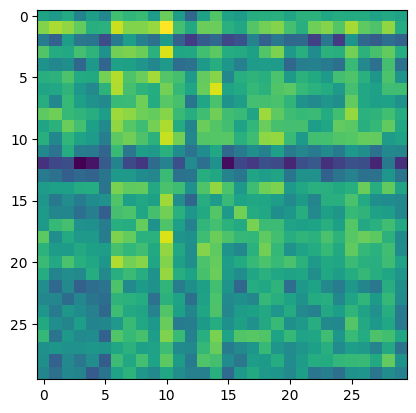

In [ ]:
result = (emb1 @ emb2.T)
result.shape
plt.imshow(result)
plt.show()

In [6]:
import librosa

SR = 16000
SEGMENT_DUR = 30

def get_whisper_embedding(audio_segment):
    response = requests.post(
        "http://localhost:8001/encode",
        json = {
            "audio": audio_segment.tolist()
        }
    )
    try:
        emb = np.array(response.json())
    except Exception as e:
        print(response.content, e)

    return emb


In [76]:
audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)

emb1 = [get_whisper_embedding(audio1[i*SR:i*SR+10*SR]) for i in range(1539, 1560, 1)]
emb2 = [get_whisper_embedding(audio2[i*SR:i*SR+10*SR]) for i in range(100, 121, 1)]
emb3 = [get_whisper_embedding(audio2[i*SR:i*SR+10*SR]) for i in range(546, 567, 1)]

/tmp/ipykernel_211336/3915489805.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio1, _ = librosa.load(Path(DATA_DIR, "ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4"), sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_211336/3915489805.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio2, _ = librosa.load(Path(DATA_DIR, "ded3d179001b3f679a0101be95405d2c.mp4"), sr=SR)
/home/jood/miniconda3/envs/lct/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [86]:
emb_1_list = [x[0][:500].mean(axis=0) for x in emb1]
emb_2_list = [x[0][:500].mean(axis=0) for x in emb2]
emb_3_list = [x[0][:500].mean(axis=0) for x in emb3]

In [79]:
np.array(emb_1_list).shape

(21, 1280)

In [ ]:
emb1 = np.concatenate(np.array(emb1)[::, 0, ...], axis=0)
emb2 = np.concatenate(np.array(emb2)[::, 0, ...], axis=0)

emb3 = np.concatenate(np.array(emb2)[::, 0, ...], axis=0)

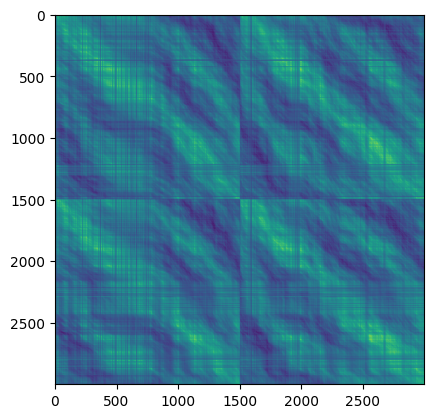

In [66]:
result = (emb1 @ emb2.T)
result.shape
plt.imshow(result)
plt.show()

In [67]:
emb1_sex = emb1.reshape(-1, 50, 1280).mean(axis=1)

In [68]:
emb2_sex = emb2.reshape(-1, 50, 1280).mean(axis=1)

In [69]:
import seaborn as sns

In [87]:
emb_1_list = np.array(emb_1_list)
emb_2_list = np.array(emb_2_list)
emb_3_list = np.array(emb_3_list)

In [84]:
emb_1_list.shape

(21, 1280)

In [85]:
emb_2_list.shape

(21, 1280)

<Axes: >

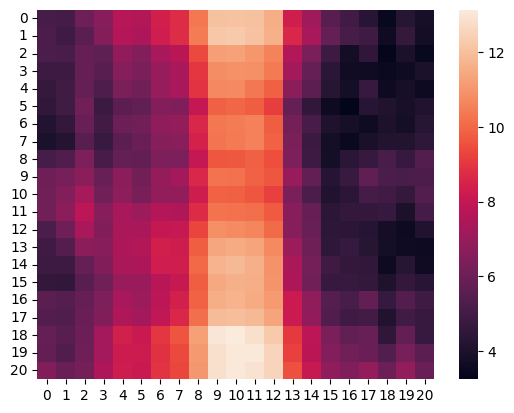

In [88]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_2_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

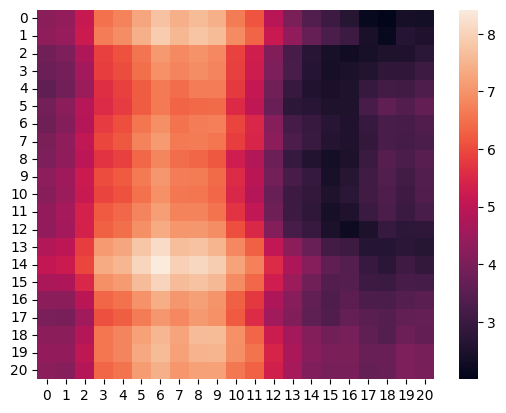

In [83]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_2_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

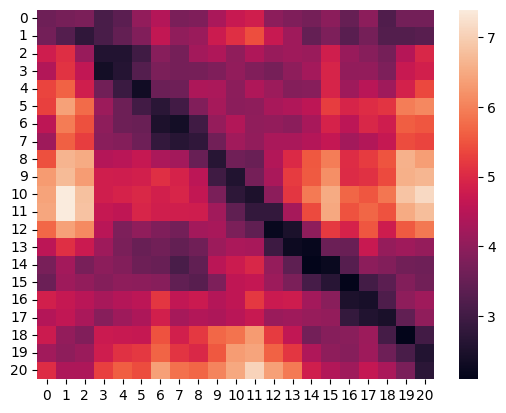

In [89]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_3_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

<Axes: >

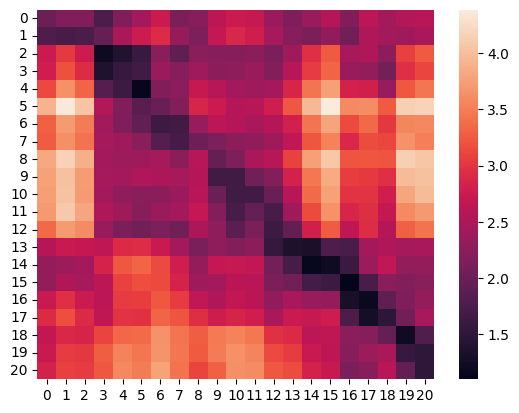

In [82]:
sns.heatmap(
    (emb_1_list[:, None,  :] - emb_3_list[None, :, :]).__pow__(2).sum(axis=-1).__pow__(0.5)
)

In [60]:
U, S, Vh = np.linalg.svd(result)

In [62]:
K = 3

In [63]:
RECONSTRUCTED_PACANBECK = (U[:, :K] * S[:K]) @ Vh[:K]

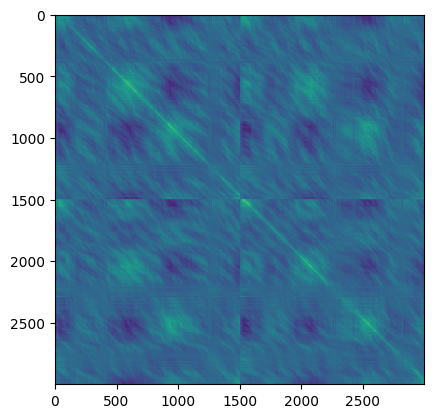

In [64]:
plt.imshow(result - RECONSTRUCTED_PACANBECK)
plt.show()

In [92]:
for i in range(0, 19, 2):
    print(i)

0
2
4
6
8
10
12
14
16
18
